In [1]:
import os
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
from tensorflow import keras

In [2]:
x_train=[];y_train=[]
import os
x = os.path.join(os.getcwd(), "test")
train=os.listdir(x)
for i in train:
    for j in os.listdir(os.path.join(x,i)):
        img1=Image.open(os.path.join(x,i,j))
        img1=img1.convert("RGB")
        x_train.append(np.array(img1))
        if i=="angry":
            y_train.append(0)
        if i=="disgust":
            y_train.append(1)
        if i=="fear":
            y_train.append(2)
        if i=="happy":
            y_train.append(3)
        if i=="neutral":
            y_train.append(4)
        if i=="sad":
            y_train.append(5)
        if i=="surprise":
            y_train.append(6)

In [3]:
print(x_train)
x_train=np.array(x_train)
y_train=np.array(y_train)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
print(x_train.shape,y_train.shape,sep='\n')

(7725, 48, 48, 3)
(7725,)


In [5]:
x_test=[];y_test=[]
x = os.path.join(os.getcwd(), "test")
#/kaggle/input/fer2013/train/angry/Training_10118481.jpg
test=os.listdir(x)
for i in test:
    for j in os.listdir(os.path.join(x,i)):
        img1=Image.open(os.path.join(x,i,j))
        img1=img1.convert("RGB")
        x_test.append(np.array(img1))
        if i=="angry":
            y_test.append(0)
        if i=="disgust":
            y_test.append(1)
        if i=="fear":
            y_test.append(2)
        if i=="happy":
            y_test.append(3)
        if i=="neutral":
            y_test.append(4)
        if i=="sad":
            y_test.append(5)
        if i=="surprise":
            y_test.append(6)

In [6]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [7]:
print(x_test.shape,y_test.shape,sep='\n')

(7725, 48, 48, 3)
(7725,)


In [8]:
shuffle_indexes = np.arange(x_train.shape[0])
np.random.shuffle(shuffle_indexes)
x_train = x_train[shuffle_indexes]
y_train = y_train[shuffle_indexes]

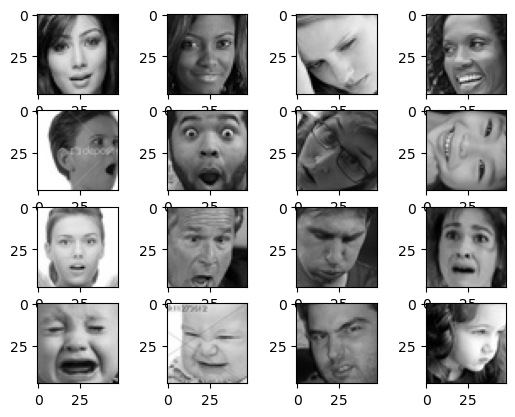

In [9]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,BatchNormalization,Dropout
from keras.models import Sequential

In [ ]:
model=Sequential()

model.add(Conv2D(16,(3,3),padding="same",input_shape=(48,48,3),activation='relu'))
model.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),padding="same",input_shape=(48,48,3),activation='relu'))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,3),activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(7,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
opt=keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
es=keras.callbacks.EarlyStopping(monitor='val_accuracy',mode="max",verbose=1,patience=20)
mcp=keras.callbacks.ModelCheckpoint('model.h5',moniter='val_accuracy',verbose=1,mode='max',save_best_only=True)
hist=model.fit(x_train,y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[es,mcp])

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

In [ ]:
plt.plot(hist.history['val_loss'],label='validation')
plt.plot(hist.history['loss'],label='train')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
plt.plot(hist.history['val_accuracy'],label='validation')
plt.plot(hist.history['accuracy'],label='train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
from keras.applications.vgg16 import VGG16,preprocess_input

In [ ]:
x1_train=[preprocess_input(img1) for img1 in x_train]

In [ ]:
x1_train=np.array(x1_train)

In [ ]:
x1_train.shape

In [ ]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))
base_model.summary()

In [ ]:
feature_train=base_model.predict(x1_train,batch_size=64)

In [ ]:
feature_train.shape

In [ ]:
feature_test=base_model.predict(x_test,batch_size=64)

In [ ]:
feature_train=feature_train.reshape(feature_train.shape[0], -1)

In [ ]:
feature_train.shape

In [ ]:
feature_test=feature_test.reshape(feature_test.shape[0], -1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import svm

In [ ]:
train_10000=feature_train[:10000]
y_train_10000=y_train[:10000]

In [ ]:
train_10000.shape

In [ ]:
clf = svm.SVC()

clf.fit(train_10000 ,y_train_10000)

# Make predictions on the test set
predictions = clf.predict(feature_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)

RF_model.fit(feature_train, y_train)

predictions = RF_model.predict(feature_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True)

tp, fp, fn, tn = cm.ravel()

recall = tp/(tp+fn)
precision = tp/(tp+fp)

print('Accuracy =', metrics.accuracy_score(y_test, prediction_RF))
print("Recall =", recall)
print("Precision =", precision)

In [ ]:
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.models import Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization

In [ ]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))
base_model.summary()

In [ ]:
for layer in base_model.layers:
    layer.trainable=False

In [ ]:
x=base_model.layers[-1].output
x=Flatten()(x)
x=Dense(7,activation='softmax')(x)

model=Model(base_model.input,x)

model.summary()

In [ ]:
opt=keras.optimizers.Adam()
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
es1=keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=20,restore_best_weights=True)
hist=model.fit(x_train,y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[es1])

In [ ]:
plt.plot(hist.history['val_loss'],label="validation")
plt.plot(hist.history['loss'],label='train')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()

In [ ]:
plt.plot(hist.history['val_accuracy'],label="validation")
plt.plot(hist.history['accuracy'],label='train')
plt.xlabel('Epochs')
plt.ylabel("accuracy")
plt.legend()

In [ ]:
base_model1=VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))
base_model1.summary()

In [ ]:
for i in range(15):
    base_model1.layers[i].trainable=False

In [ ]:
y=base_model1.layers[-1].output
y=Flatten()(y)
y=Dense(7,activation='softmax')(y)
    
model1=Model(inputs=base_model1.input,outputs=y)
model1.summary()

In [ ]:
opt=keras.optimizers.Adam(learning_rate=0.05)
model1.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
es2=keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=20,restore_best_weights=True)
hist1=model1.fit(x_train,y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[es2])

In [ ]:
plt.plot(hist1.history['val_loss'],label="validation")
plt.plot(hist1.history['loss'],label='train')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()

In [ ]:
plt.plot(hist1.history['val_accuracy'],label="validation")
plt.plot(hist1.history['accuracy'],label='train')
plt.xlabel('Epochs')
plt.ylabel("accuracy")
plt.legend()

In [ ]:
base_model2=VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))
base_model2.summary()